# Импорт

In [1]:
import numpy as np
import pandas as pd

# Загружаем данные

In [2]:
users_df = pd.read_csv('data/df_users.csv')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   user_id  1000000 non-null  int64
 1   gender   1000000 non-null  int64
 2   age      1000000 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [3]:
sales_df = pd.read_csv('data/df_sales.csv')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39530489 entries, 0 to 39530488
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   day      int64
 2   sales    int64
dtypes: int64(3)
memory usage: 904.8 MB


# Посмотрим на пользователей

Чтобы лучше понять данные:
- описательные статистики;
- статистики в разрезе групп/бинов фичей;  

Гипотезы:
- распределение клиентов по возрасту в разрезе пола не отличается

Заметки/Выводы:
- 1 млн клиентов (мужчин + женщин)
- женщин больше чем мужчин
- возраст клиентов от 17 до 60, в среднем 26
- большая часть клиентов в возрасте от 16 до 34
- распределение возраста в разрезе пола одинаковое

## Статистики

In [4]:
users_df.describe()

,user_id,gender,age
count,1.000000e+06,1000000.000000,1000000.000000
mean,5.497805e+06,0.429803,26.342514
std,2.599346e+06,0.495048,4.522483
min,1.000002e+06,0.000000,17.000000
25%,3.241010e+06,0.000000,23.000000
50%,5.497462e+06,0.000000,26.000000
75%,7.747420e+06,1.000000,29.000000
max,9.999973e+06,1.000000,60.000000


In [5]:
users_df['user_id'].nunique()

1000000

In [6]:
users_df.groupby('gender').size()

gender
0    570197
1    429803
dtype: int64

In [7]:
users_df.groupby(pd.cut(users_df['age'], bins=10)).size() / len(users_df)

age
(16.957, 21.3]    0.100653
(21.3, 25.6]      0.398763
(25.6, 29.9]      0.299619
(29.9, 34.2]      0.146415
(34.2, 38.5]      0.035691
(38.5, 42.8]      0.012266
(42.8, 47.1]      0.004810
(47.1, 51.4]      0.001143
(51.4, 55.7]      0.000393
(55.7, 60.0]      0.000247
dtype: float64

## Гипотезы

<AxesSubplot:xlabel='gender,age'>

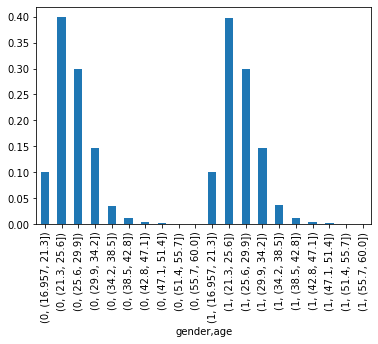

In [8]:
(users_df.groupby(['gender', pd.cut(users_df['age'], bins=10)]).size() / users_df.groupby('gender').size()).plot.bar()

# Посмотрим на покупки

Чтобы лучше понять данные:
- описательные статистики;
- статистики в разрезе групп/бинов фичей;  

Гипотезы:
- в покупках есть сезонность;
- в суммах покупок есть выбросы;
- пользователей можно разбить на группы по характеру их покупок;

Заметки/Выводы:
- менее 1 тыс клиентов не сделали ни одной покупки за весь период;
- минимальная сумма покупки 0, а максимальная 25 тыс;
- в покупках есть сезонность, но не недельная, 2 недельная;
- есть клиенты которые покупаю только в определенные 1-2 дня;
- большинство клиентов совершает 1-2 покупки в день;
- в основновном клиенты совершают покупки до 5 тыс, но сложно сказать является ли покупка на 5-25 тыс выбросом;

## Статистики

In [9]:
sales_df.describe()

,user_id,day,sales
count,3.953049e+07,3.953049e+07,3.953049e+07
mean,5.497879e+06,2.737179e+01,4.692588e+02
std,2.599535e+06,1.608263e+01,3.956991e+02
min,1.000002e+06,0.000000e+00,0.000000e+00
25%,3.241889e+06,1.400000e+01,2.110000e+02
50%,5.497750e+06,2.800000e+01,3.790000e+02
75%,7.747442e+06,4.200000e+01,6.050000e+02
max,9.999973e+06,5.500000e+01,2.604700e+04


In [10]:
sales_df['user_id'].nunique()

999376

### День покупки

In [11]:
((sales_df['day'] >= 0) & (sales_df['day'] < 56)).all()

True

<AxesSubplot:xlabel='day'>

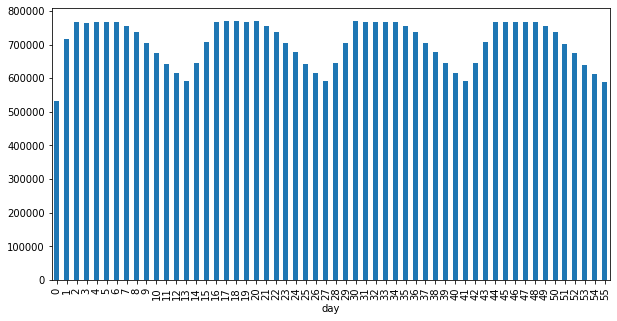

In [12]:
sales_df.groupby('day').size().plot.bar(figsize=(10, 5))

<AxesSubplot:xlabel='day'>

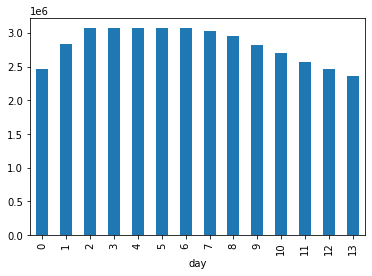

In [13]:
sales_df.groupby(sales_df['day'] % 14).size().plot.bar()

<AxesSubplot:xlabel='day_of_two_week'>

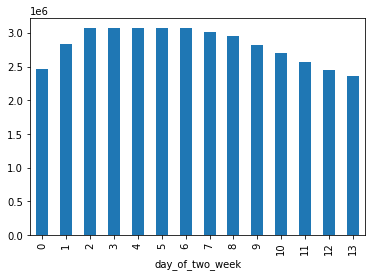

In [14]:
sales_df['day_of_two_week'] = sales_df['day'] % 14
sales_df.groupby('day_of_two_week').size().plot.bar()

<AxesSubplot:ylabel='Frequency'>

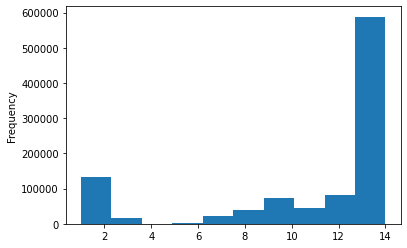

In [15]:
sales_df.groupby('user_id')['day_of_two_week'].nunique().plot.hist()

In [16]:
sales_count_in_day = (sales_df
                      .groupby(['user_id', 'day'], as_index=False)
                      .size())
sales_count_in_day.head()

,user_id,day,size
0,1000002,2,1
1,1000002,3,1
2,1000002,5,1
3,1000002,7,1
4,1000002,8,1


In [27]:
sales_count_in_day.describe()

,user_id,day,size
count,2.843954e+07,2.843954e+07,2.843954e+07
mean,5.497809e+06,2.737140e+01,1.389983e+00
std,2.599398e+06,1.608453e+01,6.066273e-01
min,1.000002e+06,0.000000e+00,1.000000e+00
25%,3.241399e+06,1.400000e+01,1.000000e+00
50%,5.497622e+06,2.800000e+01,1.000000e+00
75%,7.747745e+06,4.200000e+01,2.000000e+00
max,9.999973e+06,5.500000e+01,4.000000e+00


In [28]:
sales_count_in_day['size'].value_counts()

1    19082984
2     7737782
3     1503167
4      115610
Name: size, dtype: int64

### Сумма покупки

<AxesSubplot:ylabel='Frequency'>

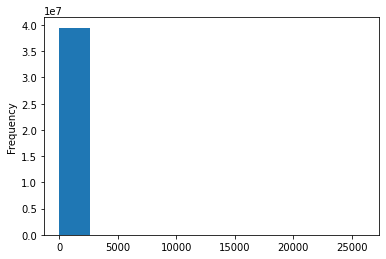

In [17]:
sales_df['sales'].plot.hist()

In [18]:
sales_df[sales_df['sales'] == 0].describe()

,user_id,day,sales,day_of_two_week
count,4.960000e+02,496.00000,496.0,496.000000
mean,5.443013e+06,20.34879,0.0,5.643145
std,2.587392e+06,22.54928,0.0,4.007527
min,1.040893e+06,0.00000,0.0,0.000000
25%,3.215790e+06,2.00000,0.0,2.000000
50%,5.524094e+06,6.00000,0.0,5.000000
75%,7.574626e+06,50.00000,0.0,9.000000
max,9.976117e+06,55.00000,0.0,13.000000


In [19]:
sales_df[sales_df['sales'] > 5_000].describe()

,user_id,day,sales,day_of_two_week
count,4.432000e+03,4432.000000,4432.000000,4432.000000
mean,5.507564e+06,27.946751,12669.004513,6.346570
std,2.589095e+06,16.355958,5770.356380,3.854779
min,1.007415e+06,0.000000,5001.000000,0.000000
25%,3.277513e+06,14.000000,7643.000000,3.000000
50%,5.528026e+06,29.000000,11429.000000,6.000000
75%,7.722062e+06,43.000000,17158.500000,9.000000
max,9.997819e+06,55.000000,26047.000000,13.000000


<AxesSubplot:>

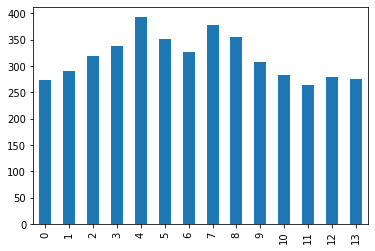

In [33]:
sales_df[sales_df['sales'] > 5_000]['day_of_two_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

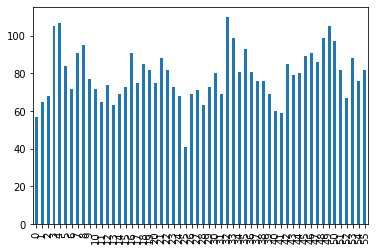

In [34]:
sales_df[sales_df['sales'] > 5_000]['day'].value_counts().sort_index().plot.bar()

# Посчитаем значение метрики до и после пилота

In [28]:
metric_df = (sales_df
             .assign(pilot=sales_df['day'].isin(np.arange(49, 55)).astype(int))
             .groupby(['user_id', 'pilot'], as_index=False)
             .agg(metric=('sales', 'mean'))
             .pivot(index='user_id', columns=['pilot'], values='metric')
             .fillna(0)
             .rename(columns={0: 'metric_prepilot', 1: 'metric_pilot'})
             .reset_index()
             .merge(users_df, how='left', on='user_id'))
metric_df.head()

,user_id,metric_prepilot,metric_pilot,gender,age
0,1000002,630.228571,565.666667,1,30
1,1000013,519.533333,707.000000,0,27
2,1000028,784.066667,507.000000,1,20
3,1000043,317.883333,256.000000,0,24
4,1000053,275.333333,0.000000,1,32


<AxesSubplot:ylabel='Frequency'>

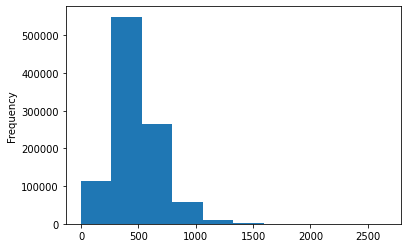

In [29]:
metric_df['metric_prepilot'].plot.hist()

## Выбросы

<AxesSubplot:>

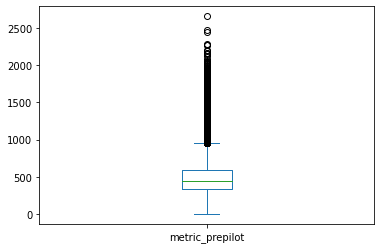

In [22]:
metric_df['metric_prepilot'].plot.box()

In [23]:
metric_df['metric_prepilot'].quantile([0.90, 0.95, 0.99])

0.90     742.779514
0.95     852.397306
0.99    1090.844079
Name: metric_prepilot, dtype: float64

## Страты

In [24]:
metric_df.groupby('gender').agg({'metric_prepilot': ['mean', lambda x: len(x) / len(metric_df)]})

metric_prepilot           
                  mean <lambda_0>
gender                           
0           456.338166   0.570202
1           506.208408   0.429798

In [25]:
metric_df.groupby(pd.cut(metric_df['age'], bins=5)).agg({'metric_prepilot': ['mean', lambda x: len(x) / len(metric_df)]})

metric_prepilot           
                          mean <lambda_0>
age                                      
(16.957, 25.6]      442.880523   0.499388
(25.6, 34.2]        521.792411   0.446057
(34.2, 42.8]        443.042244   0.047965
(42.8, 51.4]        395.285791   0.005951
(51.4, 60.0]        392.868438   0.000639

## Корреляция

In [27]:
np.corrcoef(metric_df['metric_prepilot'].values, metric_df['metric_pilot'].values,)[0, 1]

0.5221532496566147

# Выводы:
- эта метрика не является ratio;
- она имеет выбросы;
- данные покупок зависимы;

# Эксперименты:
- отфильтровать выбросы;
- применить CUPED;
- применить стратификацию;
- применить CUPED+стратификацию;
- избавиться от зависимости в данных;